# EDA of Titanic

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
eda=pd.read_csv('TITANIC.csv')

In [3]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
eda.shape #891 Passengers , 12 coloumns

(891, 12)

In [5]:
eda.isnull().sum() #177 Passengers age are not defined, 2 Passengers Port of Embarkment is not given

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
eda.info() #Info on various variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
eda.describe() #Statistical analysis of coloumns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#                                             Univariate Analysis

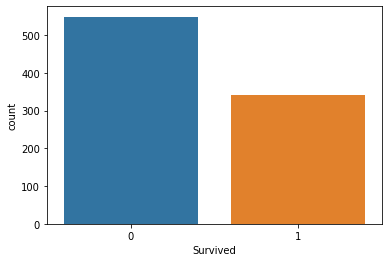

In [8]:
sns.countplot(x='Survived', data=eda)

Survived Passesngers are less than the Died passengers

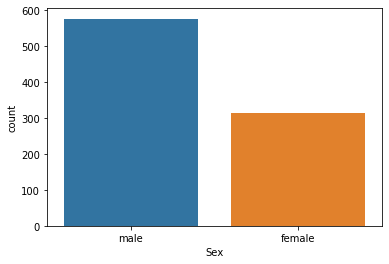

In [9]:
sns.countplot(x='Sex', data=eda)

There were more male than female on the Titanic

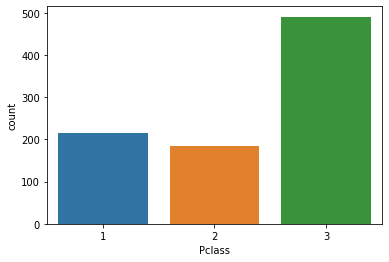

In [10]:
sns.countplot(x='Pclass', data=eda)

More Passenger were seated in the 3rd Class than the other 2 classes 

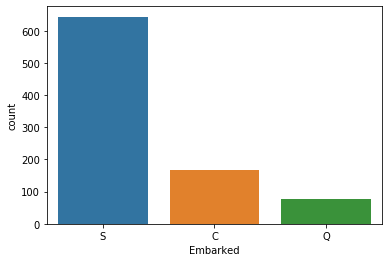

In [11]:
sns.countplot(x='Embarked', data=eda)

Most Passengers Embarked from Southampton

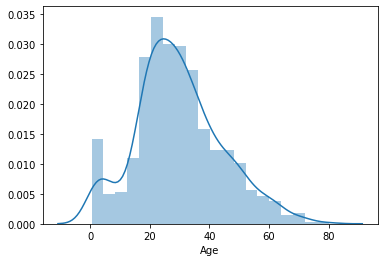

In [12]:
sns.distplot(eda['Age'])

There were more passengers in the age group of 25-30 than the other age groups

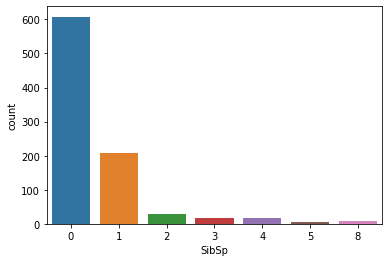

In [13]:
sns.countplot(eda['SibSp'])

Majority of people in the Titanic did not have Siblings or Spouse

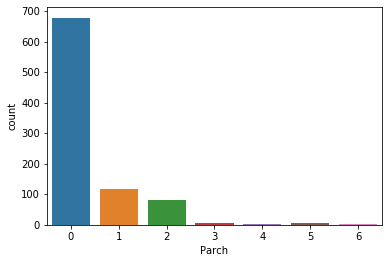

In [14]:
sns.countplot(eda['Parch'])

Majority of people in the Titanic did not have Parents or Children

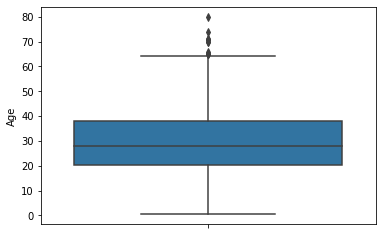

In [15]:
sns.boxplot(y='Age', data=eda)

There were minority of people outisd usual age group

#                         Bivariate Analysis

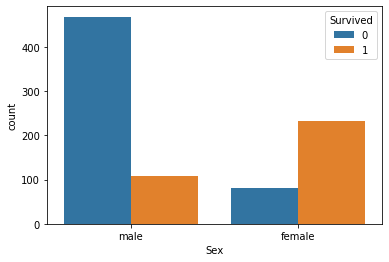

In [16]:
sns.countplot(x="Sex" ,hue='Survived', data=eda)

More number of Males died than the Females

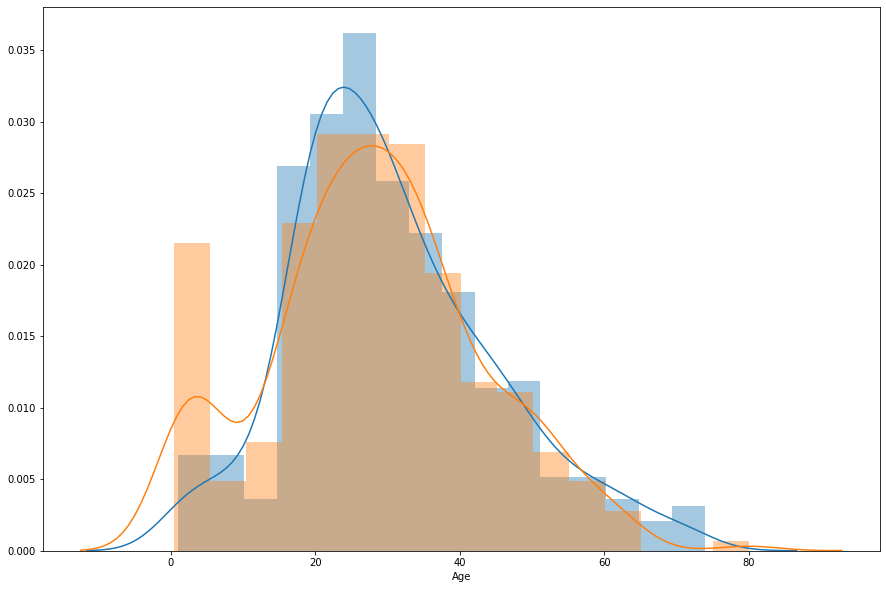

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(eda[eda['Survived']==0]['Age'])  #Orange
sns.distplot(eda[eda['Survived']==1]['Age'])  #Blue

Distribution Plot of Passengers Survived with Age

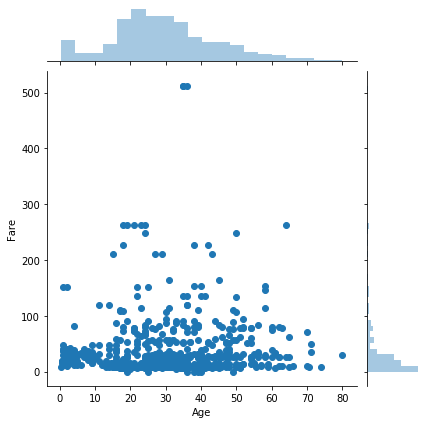

In [18]:
sns.jointplot(x='Age', y='Fare', data = eda )

JointPlot of Age with Fare

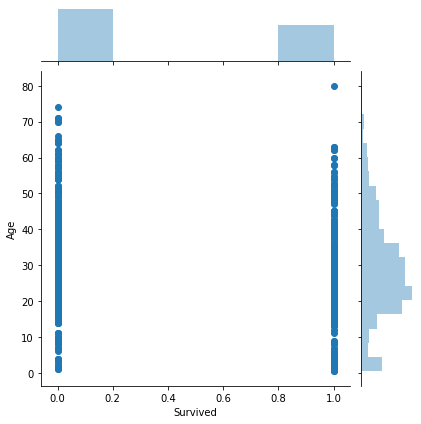

In [19]:
sns.jointplot(x='Survived', y='Age', data = eda )

Infants were highly prioritized for saving

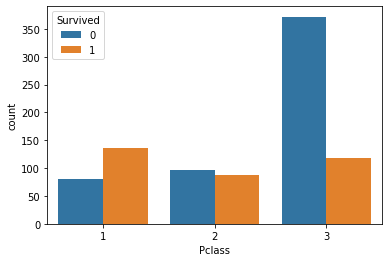

In [20]:
sns.countplot(x='Pclass', hue='Survived' ,data = eda )

Passengers from 3rd class survived the least

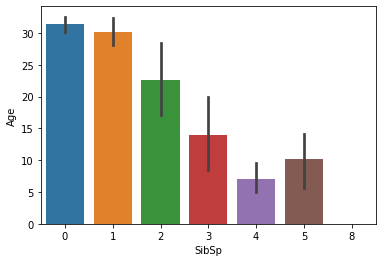

In [21]:
sns.barplot(y='Age', x='SibSp', data=eda) 

People with more Siblings/Spouse were of lesser age comparatively

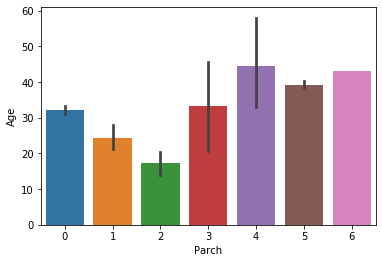

In [22]:
sns.barplot(y='Age', x='Parch', data=eda) 

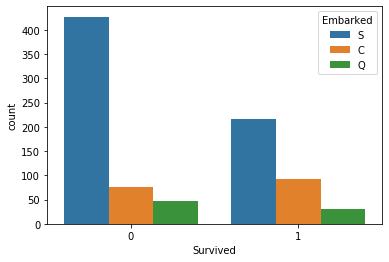

In [23]:
sns.countplot(x='Survived', hue='Embarked',data = eda )

There were more survivors from Cherbough than any other port comparatively

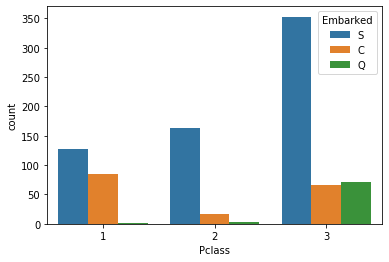

In [24]:
sns.countplot(x='Pclass', hue='Embarked',data = eda )

Most of the people from Queentown were from 3rd Class

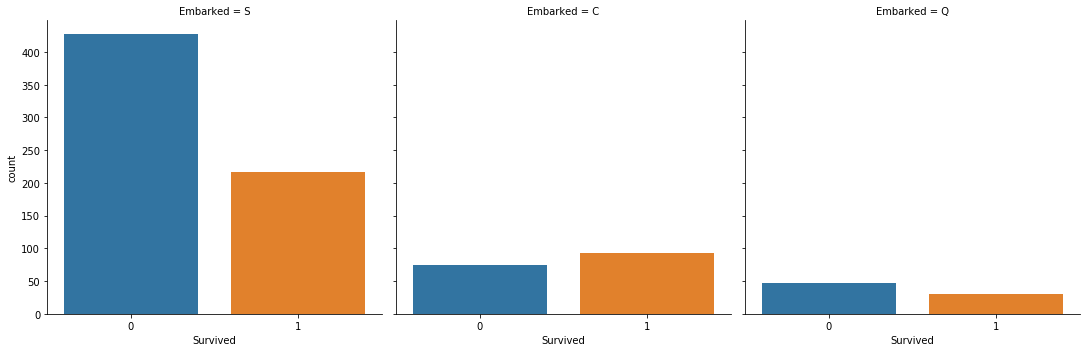

In [25]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=eda);

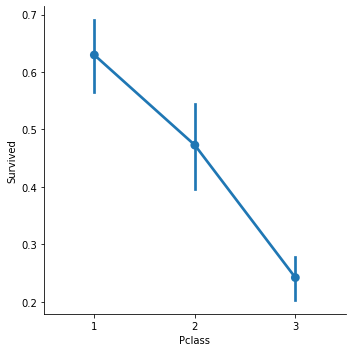

In [26]:
sns.catplot('Pclass','Survived', kind='point', data=eda);

In [27]:
counts = eda.groupby(['Sex', 'Survived'], axis= 0)
counts.size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

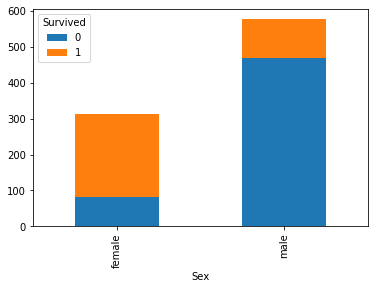

In [28]:
pd.crosstab(eda['Sex'],eda['Survived']).plot(kind='bar',stacked=True)

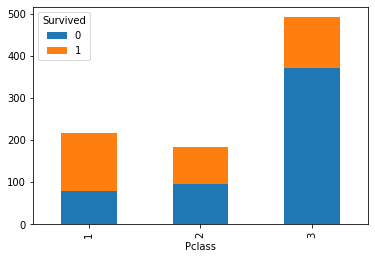

In [29]:
pd.crosstab(eda['Pclass'],eda['Survived']).plot(kind='bar',stacked=True)

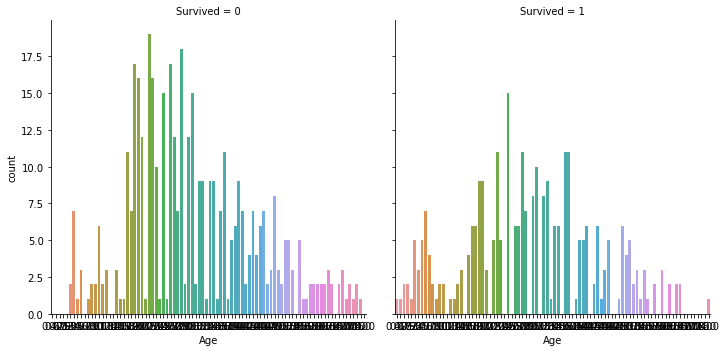

In [30]:
sns.catplot(x='Age', col='Survived', kind='count', data=eda);

Most of the infants were saved , people of higher ages were not given the most priorty..

# Multivariate Analysis

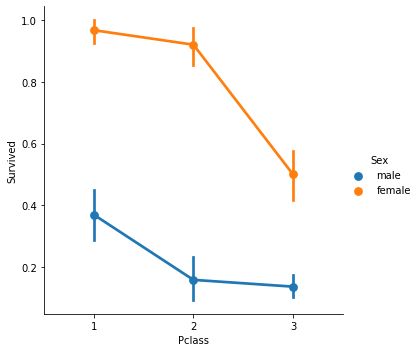

In [32]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=eda);

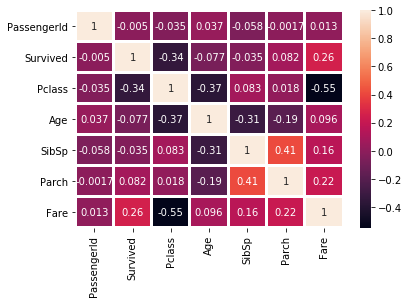

In [33]:
sns.heatmap(eda.corr(), annot=True, linewidth=2)


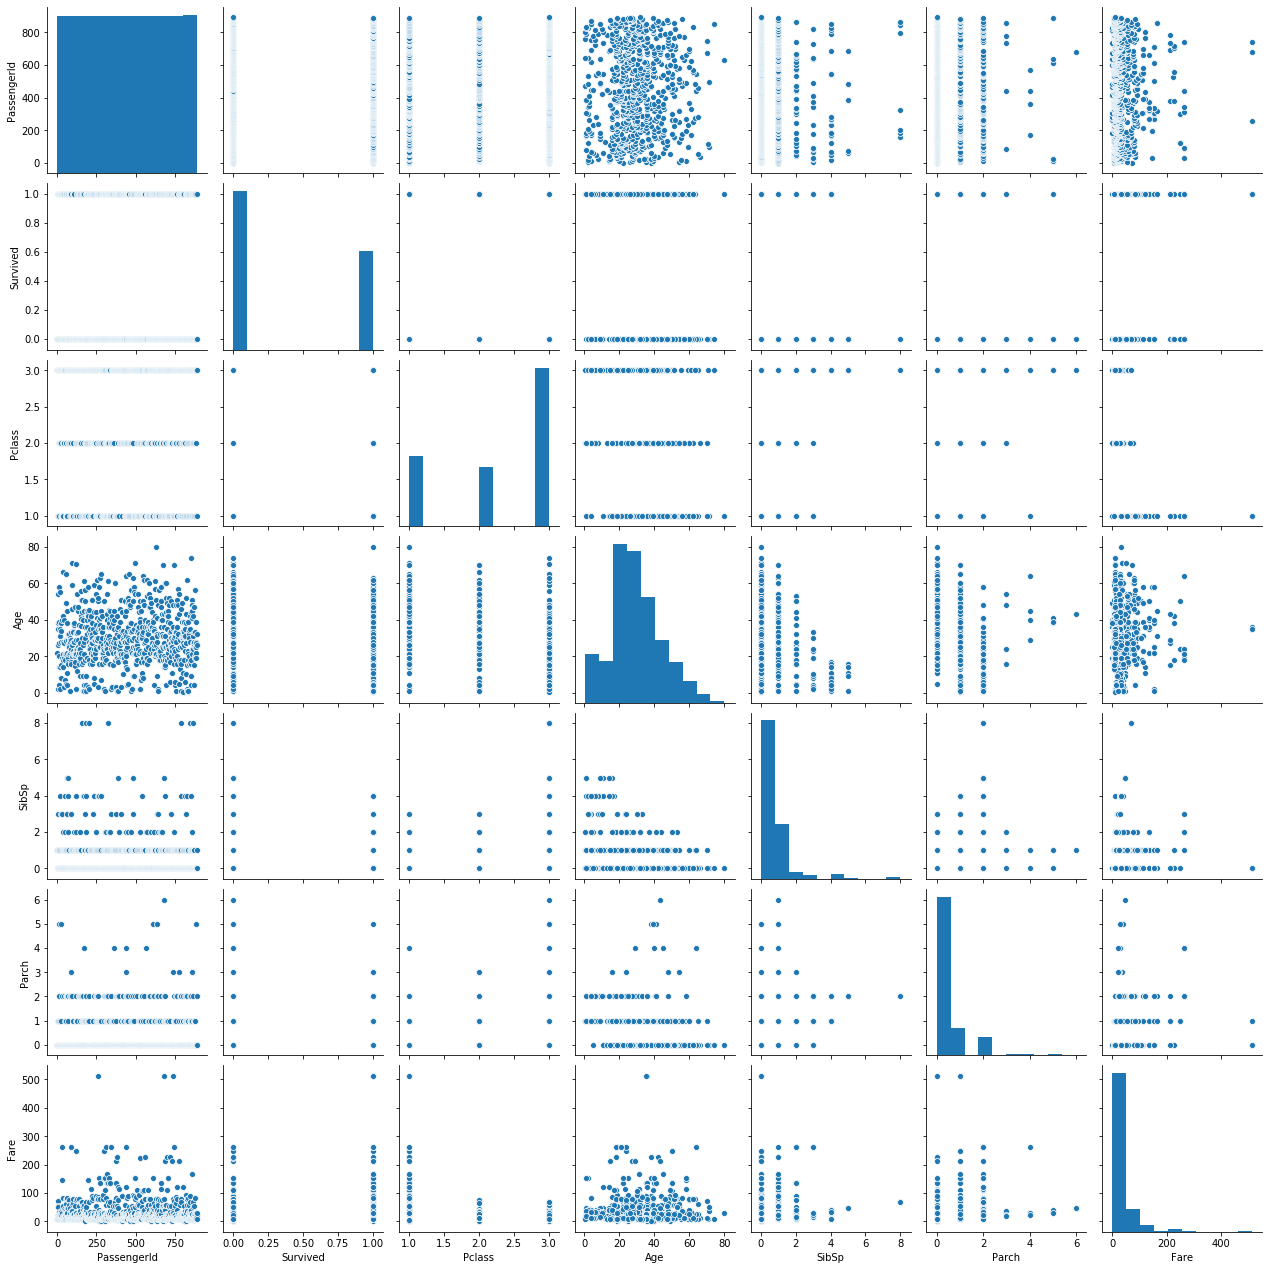

In [34]:

sns.pairplot(eda)


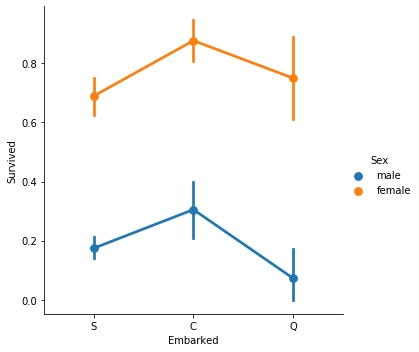

In [35]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=eda);

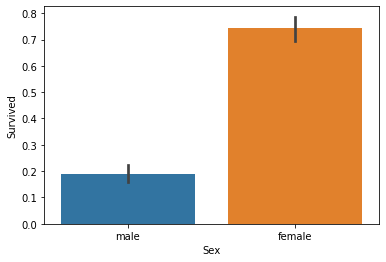

In [36]:
 sns.barplot(x='Sex', y='Survived', data=eda)


In [37]:
#Missing Value Treatment

In [38]:
eda.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
eda.isnull().values.any() 

True

Finding if there are any NULL values 

In [40]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding sum of null values of each variable

In [42]:
eda.drop(['Cabin','Ticket','Name'],axis='columns',inplace=True) 

Dropping these columns as they are unnecessary

In [43]:
eda.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [44]:
eda.drop(['PassengerId'],axis='columns',inplace=True) 

Dropping this columns as it is unnecessary

In [45]:
eda.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Finding sum of null values of each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236B7F63288>]],
      dtype=object)

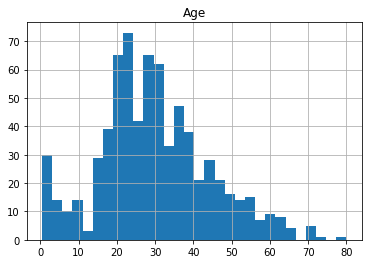

In [46]:
eda.hist(column=['Age'], bins=30)

In [47]:
eda['Age']=eda['Age'].fillna(value=eda['Age'].mean()) 

Filling Missing Age with mean

In [48]:
eda.dropna() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [55]:
eda.drop([61,829],axis = 0,inplace= True)

In [56]:
eda.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Outliers

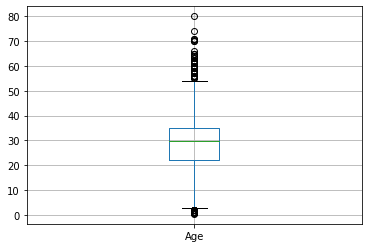

In [57]:
eda.boxplot(column = ['Age'])

In [58]:
eda['Age'].describe() 

count    888.000000
mean      29.669948
std       12.966332
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
IQR = eda['Age'].quantile(0.75)-eda['Age'].quantile(0.25)
print(IQR)

13.0


In [60]:
Upper_OutlierLimit = eda['Age'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = eda['Age'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)


54.5
2.5


In [61]:
OutlierValues = eda[(eda['Age']>=Upper_OutlierLimit) | (eda[
'Age']<=Lower_OutlierLimit)]

In [62]:
OutlierValues

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
11,1,1,female,58.00,0,0,26.5500,S
15,1,2,female,55.00,0,0,16.0000,S
16,0,3,male,2.00,4,1,29.1250,Q
33,0,2,male,66.00,0,0,10.5000,S
...,...,...,...,...,...,...,...,...
824,0,3,male,2.00,4,1,39.6875,S
827,1,2,male,1.00,0,2,37.0042,C
831,1,2,male,0.83,1,1,18.7500,S
851,0,3,male,74.00,0,0,7.7750,S


There are 66 Outliers in age , we do not remove them as they cannot be a Data-Entry mistake or Processing Error

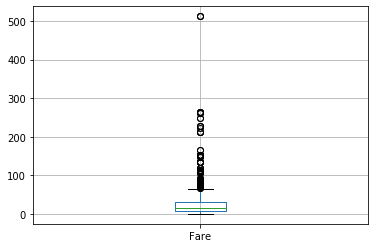

In [63]:
eda.boxplot(column = ['Fare'])

In [64]:
eda['Fare'].describe() 

count    888.000000
mean      32.116549
std       49.721978
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [65]:
IQR = eda['Fare'].quantile(0.75)-eda['Fare'].quantile(0.25)
print(IQR)

23.1042


In [66]:
Upper_OutlierLimit = eda['Fare'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = eda['Fare'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

65.6563
-26.7605


In [67]:
OutlierValues = eda[(eda['Fare']>=Upper_OutlierLimit) | (eda[
'Fare']<=Lower_OutlierLimit)]

In [68]:
OutlierValues

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.000000,1,0,71.2833,C
27,0,1,male,19.000000,3,2,263.0000,S
31,1,1,female,29.699118,1,0,146.5208,C
34,0,1,male,28.000000,1,0,82.1708,C
52,1,1,female,49.000000,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,8,2,69.5500,S
849,1,1,female,29.699118,1,0,89.1042,C
856,1,1,female,45.000000,1,1,164.8667,S
863,0,3,female,29.699118,8,2,69.5500,S


There are 116 Outliers in age , we do not remove them as they cannot be a Data-Entry mistake or Processing Error

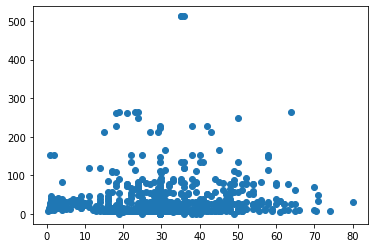

In [69]:
plt.scatter(eda['Age'], eda['Fare'])


# Feature Engineering

In [70]:
pd.get_dummies(eda['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Creating dummy values for port of Embarkment

In [71]:
pd.get_dummies(eda['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


Creating dummy values for sex of Passenger

In [72]:
sex = pd.get_dummies(eda['Sex'],drop_first=True)
embark = pd.get_dummies(eda['Embarked'],drop_first=True)

Replacing Dummy values with actual values

In [73]:
eda.drop(['Sex','Embarked',],axis=1,inplace=True)

Dropping Sex and Embarked columns

In [74]:
eda = pd.concat([eda,sex,embark],axis=1)

Concatenating dummy columns with the main dataset

In [75]:
eda.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [76]:
eda['family_size']=eda['Parch'] + eda['SibSp']

Creating Family size based on number of siblings,Spouse,Children and Parents

In [77]:
def family_type(number):
    if number==0:
        return "Single"
    elif number>0 and number<=4:
        return "Small"
    else:
        return "Large"

In [78]:
eda['family_type']=eda['family_size'].apply(family_type)

In [79]:
eda.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [80]:
eda.sample(5)

,Survived,Pclass,Age,Fare,male,Q,S,family_type
882,0,3,22.000000,10.5167,0,0,1,Single
275,1,1,63.000000,77.9583,0,0,1,Small
626,0,2,57.000000,12.3500,1,1,0,Single
270,0,1,29.699118,31.0000,1,0,1,Single
690,1,1,31.000000,57.0000,1,0,1,Small


In [81]:
pd.crosstab(eda['family_type'], eda['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Large,85.1,14.9
Single,69.9,30.1
Small,44.1,55.9


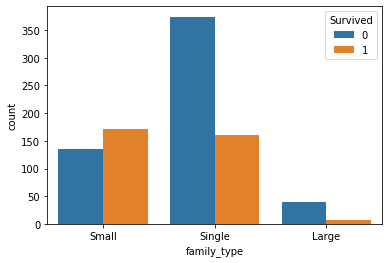

In [97]:
sns.countplot(x="family_type" ,hue='Survived', data=eda)

In [92]:
age_grp = [] 
for number in eda["Age"]: 
    if number>0 and number<=5:
          age_grp.append("Baby") 
    elif number>5 and number<=10:
          age_grp.append("Children") 
    elif number>10 and number<=20:
          age_grp.append("Teen") 
    elif number>20 and number<=50:
          age_grp.append("Adult") 
    elif number>50 and number<=70:
          age_grp.append("Elderly") 
    else:
          age_grp.append("OldAge") 
       
eda["age_grp"] = age_grp    
print(eda)

     Survived  Pclass        Age     Fare  male  Q  S family_type age_grp
0           0       3  22.000000   7.2500     1  0  1       Small   Adult
1           1       1  38.000000  71.2833     0  0  0       Small   Adult
2           1       3  26.000000   7.9250     0  0  1      Single   Adult
3           1       1  35.000000  53.1000     0  0  1       Small   Adult
4           0       3  35.000000   8.0500     1  0  1      Single   Adult
..        ...     ...        ...      ...   ... .. ..         ...     ...
886         0       2  27.000000  13.0000     1  0  1      Single   Adult
887         1       1  19.000000  30.0000     0  0  1      Single    Teen
888         0       3  29.699118  23.4500     0  0  1       Small   Adult
889         1       1  26.000000  30.0000     1  0  0      Single   Adult
890         0       3  32.000000   7.7500     1  1  0      Single   Adult

[888 rows x 9 columns]


Creating different Age groups for passengers

In [93]:
eda.head()

,Survived,Pclass,Age,Fare,male,Q,S,family_type,age_grp
0,0,3,22.0,7.2500,1,0,1,Small,Adult
1,1,1,38.0,71.2833,0,0,0,Small,Adult
2,1,3,26.0,7.9250,0,0,1,Single,Adult
3,1,1,35.0,53.1000,0,0,1,Small,Adult
4,0,3,35.0,8.0500,1,0,1,Single,Adult


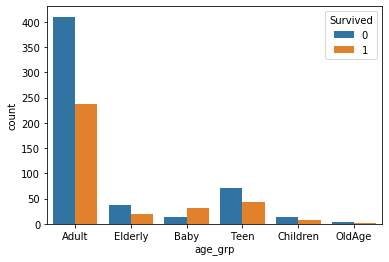

In [96]:
sns.countplot(x="age_grp" ,hue='Survived', data=eda)